In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
import scipy.stats as stats
from IPython.display import display
import pandas as pd
from utils import *

In [2]:
@timer_func
@multi_thread_wrapper
@multi_input_wrapper
@compute_Heston
def Algo_1st_Heston(rou,r,sigma,a,k,n,x0,N):
    return Heston_1st(rou,r,sigma,a,k,n,x0,N)

@timer_func
@multi_thread_wrapper
@multi_input_wrapper
@compute_Heston
def Algo_2nd_Heston(rou,r,sigma,a,k,n,x0,N):
    return Heston_2nd(rou,r,sigma,a,k,n,x0,N)

@timer_func
@multi_thread_wrapper
@multi_input_wrapper
@compute_Heston
def Algo_3rd_Heston(rou,r,sigma,a,k,n,x0,N):
    return Heston_3rd(rou,r,sigma,a,k,n,x0,N)

TypeError: Heston_1st() takes 8 positional arguments but 9 were given

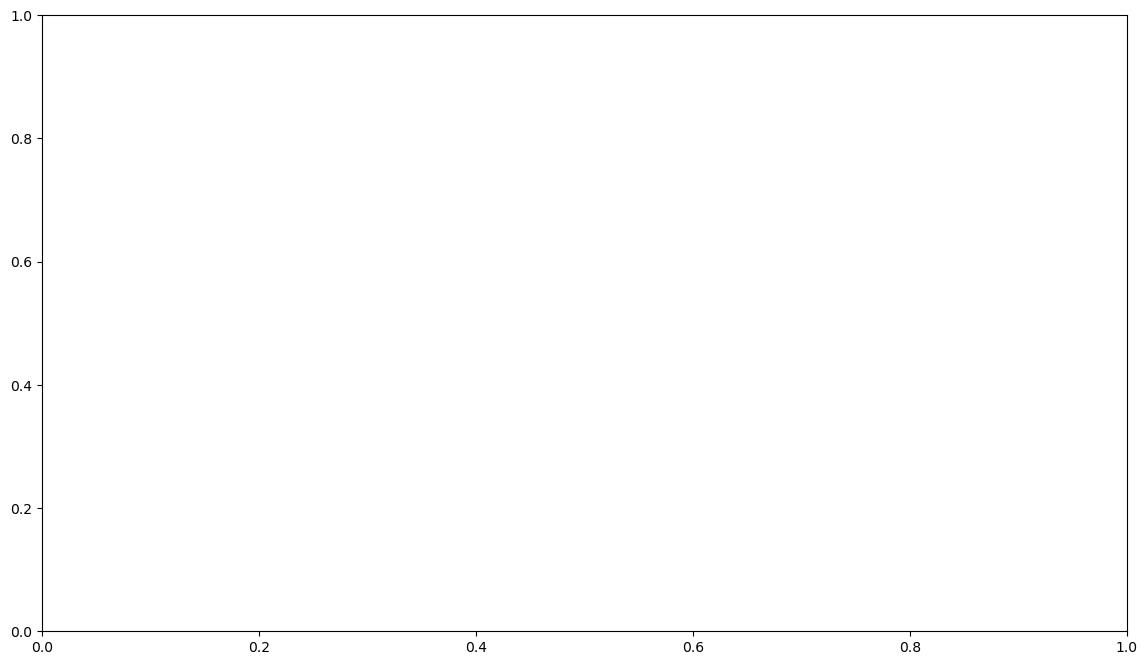

In [3]:
alpha=0.05
z=stats.norm.ppf(1-alpha/2)
times=60
N=10000

T = 1
K = 80
r = 0.02
sigma = 0.4
rho =  -0.5
a = 0.02
k = 0.5
x1 = np.log(100)
x2 = 0.04

x0=np.array((np.array([x1]*N),
            np.array([x2]*N),
            [0]*N,
            [0]*N))

xx=np.array([5,8,10,15,20,30,50,100])
# param_dicts=[{'rou':-0.5,'r':0.02,'sigma':0.4,'a':0.02,'k':0.5,'n':n,'x0':x0,'N':N} for n in xx]
param_dicts=[{'rou':rho,'r':r,'sigma':sigma,'a':a,'k':k,'n':n,'x0':x0,'N':N} for n in xx]

fig,ax = plt.subplots(figsize=(14,8))

yy1=[esperance_Heston(times,param_dict["r"],K=K)(Algo_1st_Heston)([copy.deepcopy(param_dict)]) for param_dict in param_dicts]
yy_err1=np.sqrt(np.var(yy1,axis=1))*z/np.sqrt(times*N)
ax.errorbar(1/xx, np.mean(yy1,axis=1), yerr=yy_err1,ecolor='r',label = 'First Order Scheme')

del yy1,yy_err1

yy2=[esperance_Heston(times,param_dict["r"],K=K)(Algo_2nd_Heston)([copy.deepcopy(param_dict)]) for param_dict in param_dicts]
yy_err2=np.sqrt(np.var(yy2,axis=1))*z/np.sqrt(times*N)
ax.errorbar(1/xx, np.mean(yy2,axis=1), yerr=yy_err2,ecolor='r',label = 'Second Order Scheme')

del yy2,yy_err2

yy3=[esperance_Heston(times,param_dict["r"],K=K)(Algo_3rd_Heston)([copy.deepcopy(param_dict)]) for param_dict in param_dicts]
yy_err3=np.sqrt(np.var(yy3,axis=1))*z/np.sqrt(times*N)
ax.errorbar(1/xx, np.mean(yy3,axis=1), yerr=yy_err3,ecolor='r',label = 'Third Order Scheme')

del yy3,yy_err3

ax.axhline(y = Heston_Put(T,K,r,a,k,rho,sigma,x1,x2),label="Exact Value",color ='black',ls="--")
# plt.ylim(1.540,1.570)
plt.legend()
plt.show()

In [ ]:
Strike_data=np.linspace(50,150,1000)
plt.plot(Strike_data,[Heston_Put(T,K,r,a,k,rho,sigma,x1,x2) for K in Strike_data])
plt.show()

Function 'Algo_2nd_Heston' executed in 3.8119s
Function 'Algo_2nd_Heston' executed in 5.6924s
Function 'Algo_2nd_Heston' executed in 7.3711s
Function 'Algo_2nd_Heston' executed in 10.6458s
Function 'Algo_2nd_Heston' executed in 15.5509s
Function 'Algo_2nd_Heston' executed in 21.5043s
Function 'Algo_2nd_Heston' executed in 34.2279s
Function 'Algo_2nd_Heston' executed in 68.2226s


KeyboardInterrupt: 

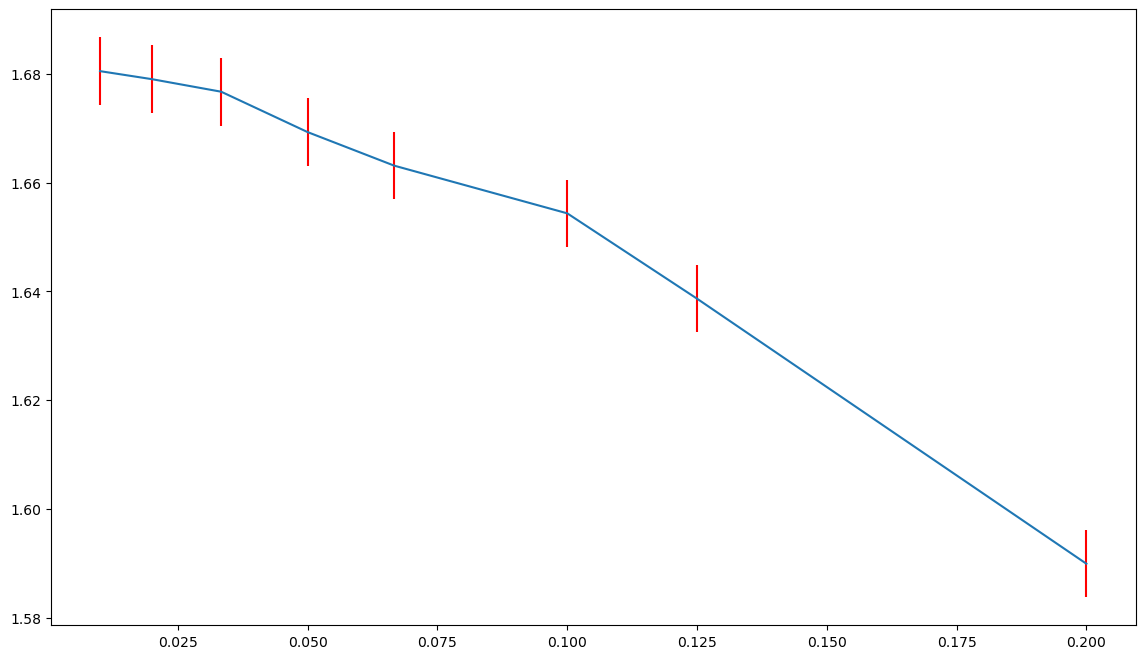

In [5]:
alpha=0.05
z=stats.norm.ppf(1-alpha/2)
times=6
N=1000000

T = 1
K = 80
r = 0.02
sigma = 1
rho =  -0.8
a = 0.02
k = 0.5
x1 = np.log(100)
x2 = 0.04

x0=np.array((np.array([x1]*N),
            np.array([x2]*N),
            [0]*N,
            [0]*N))

xx=np.array([5,8,10,15,20,30,50,100])
# param_dicts=[{'rou':-0.5,'r':0.02,'sigma':0.4,'a':0.02,'k':0.5,'n':n,'x0':x0,'N':N} for n in xx]
param_dicts=[{'rou':rho,'r':r,'sigma':sigma,'a':a,'k':k,'n':n,'x0':x0,'N':N} for n in xx]

fig,ax = plt.subplots(figsize=(14,8))

yy2=[esperance_Heston(times,param_dict["r"],K=K)(Algo_2nd_Heston)([copy.deepcopy(param_dict)]) for param_dict in param_dicts]
yy_err2=np.sqrt(np.var(yy2,axis=1))*z/np.sqrt(times*N)
ax.errorbar(1/xx, np.mean(yy2,axis=1), yerr=yy_err2,ecolor='r',label = 'Second Order Scheme')

del yy2,yy_err2

yy3=[esperance_Heston(times,param_dict["r"],K=K)(Algo_3rd_Heston)([copy.deepcopy(param_dict)]) for param_dict in param_dicts]
yy_err3=np.sqrt(np.var(yy3,axis=1))*z/np.sqrt(times*N)
ax.errorbar(1/xx, np.mean(yy3,axis=1), yerr=yy_err3,ecolor='r',label = 'Third Order Scheme')

del yy3,yy_err3

ax.axhline(y = Heston_Put(T,K,r,a,k,rho,sigma,x1,x2),label="Exact Value",color ='black',ls="--")
plt.ylim(1.60,1.78)
plt.legend()
plt.show()